In [29]:
import pandas as pd
from icecream import ic
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [30]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [31]:
# ic(train.info())

In [32]:
ob_col = ['TypeofContact', 'Occupation',
          'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
train.replace('Fe Male', 'Female')
# ic(train['Gender'])

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [33]:
for col, dtype in train.dtypes.items():
    if dtype == 'object':
        # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
        value = 'Unknown'
        train.loc[:,col] = train[col].fillna(value)
        test.loc[:,col] = test[col].fillna(value)
    elif dtype == int or dtype == float:
        # 수치형 칼럼의 경우 0을 채워줍니다.
        value = 0
        train.loc[:,col] = train[col].fillna(value)
        test.loc[:,col] = test[col].fillna(value)
# print(train.isna().sum())

In [34]:
encoder = LabelEncoder()
encoder.fit(train['TypeofContact'])
encoder.transform(train['TypeofContact'])

for col in ob_col:
    encoder = LabelEncoder()
    encoder.fit(train[col])
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
# ic(train)
# ic(test)

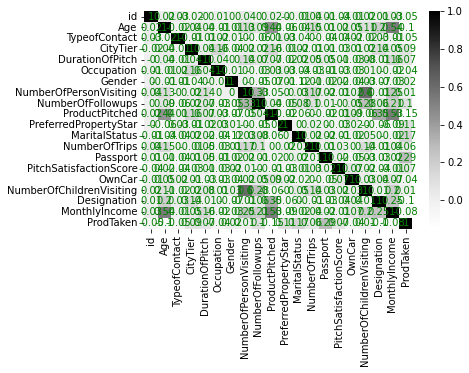

In [35]:
corr_df = train.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
pd.set_option('display.max_columns',None)
# ic(corr_df)
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
# plt.savefig('corr.png')

In [36]:
model = RandomForestClassifier(n_estimators=100)

In [37]:
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [38]:
x = train.drop(columns=['ProdTaken'])
y = train['ProdTaken']

# ic(x)
# ic(y)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=49)


In [40]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
val_predict = model.predict(x_val) 

In [42]:
from sklearn import metrics   
print('정확도 :', metrics.accuracy_score(y_val, val_predict))

정확도 : 0.8235294117647058
